# Captone Project - Predicting the occurrence of severe car accidents in Seattle, Washington, USA

### Applied Data Science Capstone by IBM/Coursera

## Table of Content
* [Introduction: Business Problem](#introduction)
* [Data](#Data)
* [Analysis](#Analysis)
* [Results and Discussion](#results)
* [Conclusion](#Conclusion)

## 1. Introduction

### 1.1 Background

Road traffic accidents and subsequent injuries have a remarkable social impact for individuals and families and are one of the leading causes of death across the globe. Although Seattle in one of the safest cities in the United States of America (USA), according to Seattle government more than 10000 collisions a year still occur, resulting in an average of 20 people losing their lives and 150 people being seriously injured. During the first half of the year 2019, 101 people were seriously injured or killed in 98 collisions on Seattle streets. That is the highest number of crashes in the first six months of a year since 2010, according to preliminary police reports analysed by the Seattle Department of Transportation (SDOT). The city of Seattle is aiming at ending traffic deaths and serious injuries on city streets by 2030, however, some reports argue that if better measures don’t take place Seattle will be far from meeting its goal.

Seattle has a warm temperate oceanic climate characterized by cool, wet winters and mild, relatively dry summers. Summertime is mildly warm and moderately dry with temperatures ranging between 20-23 Celsius degrees, with daylight hours up to sixteen hours. In contrast, winters are cold and wet, with low temperatures between 2-10 Celsius degrees, and due to the rainfall most days roads are wet and slippery. Rainfall is experienced for an average of eighteen days per month, and the rain gauge collects approximately 147.3 mm. Snow falls are high and regular, accumulating up to 43.2 mm, mostly in December and February. The average sunshine hours per day are two. Adverse conditions and road status could play a pivotal road in the occurrence of fatal car accidents.



### 1.2 Problem and Interest

In order to establish new measures to reduce the number of mortalities and injuries caused by car collisions, this study aims to find features like road conditions, light conditions, speed, weather, and inattention that can foster car collisions, with the ultimate goal of preventing or diminishing car crashes, making Seattle’s roads safer for all inhabitants, extendable to other cities across USA and the rest of the world. 

## 2. Data

### 2.1 Data acquisition

The data used for this study comprises a csv file and metadata from all collisions in Seattle provided by the Seattle Police Department (SPD) and recorded by Traffic Records from 2004 to present. I will use the data to structure a classification model and determine whether the above mentioned features can promote car collisions leading to injured people.

#### Let's have a look at the data. Load dataset from a csv file

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.image as mpimg
from io import StringIO
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import folium
import webbrowser
from folium import plugins


#Importing Dataset
df = pd.read_csv('G:\Irene\Courses\Python\Applied Data Science Capstone\My Capstone Project\Data-Collisions.csv')
df.head()

C:\Users\Irene\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
#Converting Severity Code from (1/2) tp (0/1)
severity_code = df['SEVERITYCODE'].values
labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)

df["SEVERITYCODE"] = severity_code

In [4]:
#Descriptive Stats
descriptive_stats= df.describe(include="all")

C:\Users\Irene\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


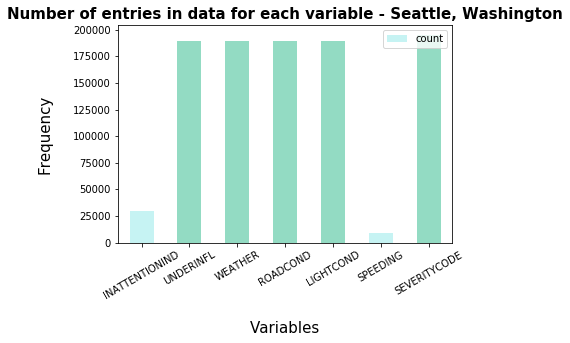

In [5]:
 #Plotting counts of selected variables
descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()

color_yo=['paleturquoise','mediumaquamarine','mediumaquamarine','mediumaquamarine','mediumaquamarine','paleturquoise','mediumaquamarine']
descriptive_stats_plot.plot(kind='bar',alpha=0.70,color=[color_yo])
plt.title('Number of entries in data for each variable - Seattle, Washington', fontsize=15, fontweight='bold')
plt.xlabel("Variables",fontsize=15,labelpad=20)
plt.ylabel("Frequency",fontsize=15,labelpad=20)
plt.xticks(rotation=30)
plt.show()


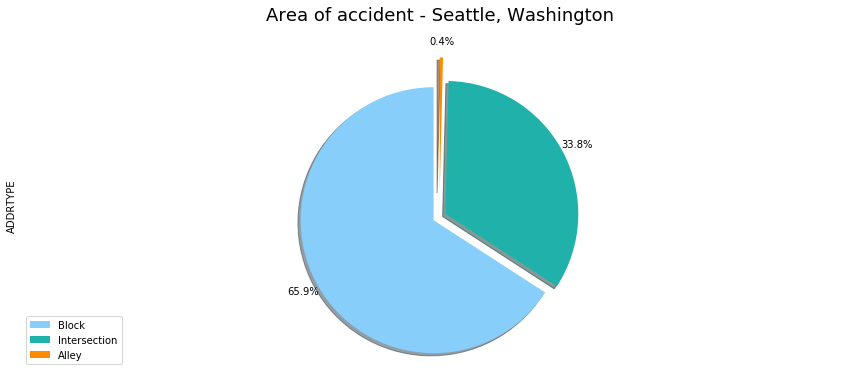

In [41]:
#Area type of each accident
explode_list = [0.05, 0.05, 0.2]
color_list=['lightskyblue','lightseagreen','darkorange']
addtype=df['ADDRTYPE'].value_counts()

addtype.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.12,
            colors=color_list,
            explode=explode_list)


plt.title('Area of accident - Seattle, Washington', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=addtype.index, loc='lower left')

plt.show()

In [7]:
#Check IncKey unqiue numbers
df['INCKEY'].nunique()

194673

In [8]:
#Encoding in attention (0 = No, 1 = Yes)
df["INATTENTIONIND"].replace("Y", 1, inplace=True)
df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)

In [9]:
#Encoding Under the influence (0 = No, 1 = Yes)
df["UNDERINFL"].replace("N", 0, inplace=True)
df["UNDERINFL"].replace("Y", 1, inplace=True)

In [10]:
#Encoding Speeding(0 = No, 1 = Yes)
df["SPEEDING"].replace("Y", 1, inplace=True)
df["SPEEDING"].replace(np.nan, 0, inplace=True)

In [11]:
#Encoding Light Conditions(0 = Light, 1 = Medium, 2 = Dark)
df["LIGHTCOND"].replace("Daylight", 0, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
df["LIGHTCOND"].replace("Dusk", 1, inplace=True)
df["LIGHTCOND"].replace("Dawn", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
df["LIGHTCOND"].replace("Other","Unknown", inplace=True)

In [12]:
#Encoding Weather Conditions(0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow
df["WEATHER"].replace("Clear", 0, inplace=True)
df["WEATHER"].replace("Raining", 3, inplace=True)
df["WEATHER"].replace("Overcast", 1, inplace=True)
df["WEATHER"].replace("Other", "Unknown", inplace=True)
df["WEATHER"].replace("Snowing", 3, inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
df["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
df["WEATHER"].replace("Partly Cloudy", 1, inplace=True)

In [13]:
#Encoding Road Conditions(0 = Dry, 1 = Mushy, 2 = Wet)
df["ROADCOND"].replace("Dry", 0, inplace=True)
df["ROADCOND"].replace("Wet", 2, inplace=True)
df["ROADCOND"].replace("Ice", 2, inplace=True)
df["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
df["ROADCOND"].replace("Other", "Unknown", inplace=True)
df["ROADCOND"].replace("Standing Water", 2, inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
df["ROADCOND"].replace("Oil", 2, inplace=True)


In [14]:
#Making new dataframe with only variables and unique keys
selected_columns=df[["X","Y","INCKEY","INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
feature_df=selected_columns.copy()
feature_df.dropna(axis=0,how='any',inplace=True)
feature_stats=feature_df.describe()

In [15]:
np.count_nonzero(feature_df['UNDERINFL'])

86923

In [16]:
 #Light Condition
lightcondsize = feature_df ["LIGHTCOND"].size

In [17]:
featureinlightcond = feature_df ['LIGHTCOND'] == 'Unknown'

lightcond = feature_df['LIGHTCOND']
lightcond = lightcond.values
lightcond = lightcond[featureinlightcond]
lightcond[0:9036]=0
lightcond[9036:13417]=1
lightcond[13417:13961]=2

feature_df.loc [feature_df.LIGHTCOND == "Unknown", 'LIGHTCOND'] = lightcond

feature_df["LIGHTCOND"]=feature_df["LIGHTCOND"].astype(int)

In [18]:
#Road Condition
roadcondsize = feature_df ["ROADCOND"].size

featureinroadcond = feature_df ['ROADCOND'] == 'Unknown'

roadcond = feature_df['LIGHTCOND']
roadcond = roadcond.values
roadcond = roadcond[featureinroadcond]

roadcond[0:9954]=0
roadcond[9954:10040]=1
roadcond[10040:15163]=2

feature_df.loc[feature_df.ROADCOND == "Unknown", 'ROADCOND'] = roadcond
feature_df["ROADCOND"]=feature_df["ROADCOND"].astype(int)


In [19]:
 #Weather Condition
weathersize = feature_df ["WEATHER"].size

featureinweather = feature_df ['WEATHER'] == 'Unknown'

weather = feature_df['WEATHER']
weather = weather.values
weather = weather[featureinweather]

weather[0:10151]=0
weather[10151:12683]=1
weather[12683:12742]=2
weather[12742:15864]=3

feature_df.loc[feature_df.WEATHER == "Unknown", 'WEATHER'] = weather
feature_df["WEATHER"]=feature_df["WEATHER"].astype(int)

In [20]:
 #Converting remaining to int
feature_df["SPEEDING"]=feature_df["SPEEDING"].astype(int)
feature_df["INATTENTIONIND"]=feature_df["INATTENTIONIND"].astype(int)
feature_df["UNDERINFL"]=feature_df["UNDERINFL"].astype(int)

In [21]:
#ML Feature Sets
X=feature_df[["SPEEDING","INATTENTIONIND","UNDERINFL","ROADCOND","WEATHER","LIGHTCOND"]].values
y=feature_df[["SEVERITYCODE"]].values

## Machine Learning Models

### Split our dataset into train and test to train and test the model

In [52]:
#Test/Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (128916, 6) (128916, 1)
Test set: (55251, 6) (55251, 1)


### Decision Tree

In [53]:
#Decision Tree Clasifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth=6)
DT.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
  #Make Prediction:
yhatDT = DT.predict(X_test)

        #Check Accuracy
print('Accuracy score for Decision Tree = ', accuracy_score(yhatDT, y_test))

        #Visualization
print('Confusion Matrix - Decision Tree')
print(pd.crosstab(y_test.ravel(), yhatDT.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

print(classification_report(yhatDT,y_test))

Accuracy score for Decision Tree =  0.6960055021628567
Confusion Matrix - Decision Tree
Predicted      0   1    All
True                       
0          38421  24  38445
1          16772  34  16806
All        55193  58  55251
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     55193
           1       0.00      0.59      0.00        58

    accuracy                           0.70     55251
   macro avg       0.50      0.64      0.41     55251
weighted avg       1.00      0.70      0.82     55251



In [64]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

knn_yhat = kNN_model.predict(X_test)

print ("Accuracy", accuracy_score(yhatDT,y_test))
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhatDT))
print("KNN F1-score: %.2f" % f1_score(y_test, yhatDT, average='weighted') )

Accuracy 0.6960055021628567
KNN Jaccard index: 0.70
KNN F1-score: 0.57


C:\Users\Irene\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


### Logistic Regression

In [61]:
#Logistic Regression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

print(log_loss(y_test, yhat_prob))

print ("Accuracy", accuracy_score(yhatLR,y_test))
print (classification_report(y_test, yhatLR))





C:\Users\Irene\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6108557143303656
Accuracy 0.6956435177643844
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     38445
           1       0.22      0.00      0.00     16806

    accuracy                           0.70     55251
   macro avg       0.46      0.50      0.41     55251
weighted avg       0.55      0.70      0.57     55251



In [65]:
print ("Accuracy", accuracy_score(yhatLR,y_test))
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhatLR))
print("KNN F1-score: %.2f" % f1_score(y_test, yhatLR, average='weighted') )

Accuracy 0.6956435177643844
KNN Jaccard index: 0.70
KNN F1-score: 0.57


C:\Users\Irene\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


#### K Nearest Neighbor (KNN)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
k = 3

#Train Model and Predict  

kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)

kNN_model



C:\Users\Irene\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [43]:
# just for sanity check
yhat = kNN_model.predict(X_test)
yhat[0:5]


array([0, 0, 0, 0, 0], dtype=int64)

In [44]:
# Best k

Ks=15

mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
#Train Model and Predict  

    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)

    yhat = kNN_model.predict(X_test)

    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc


C:\Users\Irene\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Irene\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Irene\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Irene\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 

array([0.62, 0.68, 0.67, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69,
       0.69, 0.66, 0.66])

In [45]:
# Building the model again, using k=4, one of the numbers of k with best performance
kNN_model = KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train)

kNN_model


C:\Users\Irene\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [54]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

knn_yhat = kNN_model.predict(X_test)

print ("Accuracy", accuracy_score(knn_yhat,y_test))
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

print(classification_report(yhatDT,y_test))

Accuracy 0.6940145879712585
KNN Jaccard index: 0.69
KNN F1-score: 0.58
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     55193
           1       0.00      0.59      0.00        58

    accuracy                           0.70     55251
   macro avg       0.50      0.64      0.41     55251
weighted avg       1.00      0.70      0.82     55251



C:\Users\Irene\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


#### SVM

In [55]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 

C:\Users\Irene\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Irene\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [56]:
SVM_yhat = SVM_model.predict(X_test)
SVM_yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
SVM_yhat = SVM_model.predict(X_test)

print ("Accuracy", accuracy_score(SVM_yhat,y_test))
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, SVM_yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, SVM_yhat, average='weighted'))

Accuracy 0.6958245099636206
SVM Jaccard index: 0.70
SVM F1-score: 0.57


C:\Users\Irene\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\Irene\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
